<a href="https://colab.research.google.com/github/davidgoins236/public/blob/main/F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data Set from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [ ]:
!kaggle datasets download -d rohanrao/formula-1-world-championship-1950-2020

  0% 0.00/5.54M [00:00<?, ?B/s]
100% 5.54M/5.54M [00:00<00:00, 113MB/s]


In [ ]:
!unzip formula-1-world-championship-1950-2020.zip

Archive:  formula-1-world-championship-1950-2020.zip
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


In [ ]:
import pandas as pd 
import numpy as np 

circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
quali = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

### Exploration

In [ ]:
#create df with only the races from 2022
cy=races.query('year == 2022')
#create a new field taht converts the euro dates from date field to a date datatype 
cy['dt'] = pd.to_datetime(cy.date, format = '%d/%m/%y')
#filter on races that have been completed so far
cy = cy[cy.dt < pd.to_datetime('today').normalize()]
cy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,raceId,year,round,circuitId,name,date,time,url,dt
1036,1074,2022,1,3,Bahrain Grand Prix,20/03/22,15:00:00,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,2022-03-20
1058,1075,2022,2,77,Saudi Arabian Grand Prix,27/03/22,17:00:00,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,2022-03-27
1059,1076,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...,2022-04-10
1060,1077,2022,4,21,Emilia Romagna Grand Prix,24/04/22,13:00:00,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,2022-04-24
1061,1078,2022,5,79,Miami Grand Prix,08/05/22,19:30:00,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,2022-05-08


In [ ]:
#View results of the most recent race?
results[results['raceId']==results['raceId'].max()].merge(drivers.loc[:,['driverId','code']]).sort_values(by = 'positionOrder')
#results.dtypes

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,code
0,25446,1076,844,6,16,1,1,1,1,26.0,58,1:27:46.548,5266548,58,1,1:20.260,236.740,1,LEC
1,25447,1076,815,9,11,3,2,2,2,18.0,58,+20.524,5287072,58,3,1:21.094,234.305,1,PER
2,25448,1076,847,131,63,6,3,3,3,15.0,58,+25.593,5292141,53,4,1:21.495,233.152,1,RUS
3,25449,1076,1,131,44,5,4,4,4,12.0,58,+28.543,5295091,51,7,1:21.886,232.039,1,HAM
4,25450,1076,846,1,4,4,5,5,5,10.0,58,+53.303,5319851,55,8,1:22.248,231.018,1,NOR
5,25451,1076,817,1,3,7,6,6,6,8.0,58,+53.737,5320285,54,9,1:22.451,230.449,1,RIC
6,25452,1076,839,214,31,8,7,7,7,6.0,58,+1:01.683,5328231,58,10,1:22.469,230.399,1,OCO
7,25453,1076,822,51,77,12,8,8,8,4.0,58,+1:08.439,5334987,54,5,1:21.651,232.707,1,BOT
8,25454,1076,842,213,10,11,9,9,9,2.0,58,+1:16.221,5342769,52,13,1:22.731,229.669,1,GAS
9,25455,1076,848,3,23,20,10,10,10,1.0,58,+1:19.382,5345930,54,12,1:22.589,230.064,1,ALB


In [ ]:
#lets see how the lap times data works
lap_times[(lap_times.raceId == lap_times.raceId.max()) & (lap_times.lap == 1)].merge(drivers.loc[:,['driverId','code']])

,raceId,driverId,lap,position,time,milliseconds,code
0,1076,844,1,1,1:29.695,89695,LEC
1,1076,830,1,2,1:30.342,90342,VER
2,1076,1,1,3,1:31.296,91296,HAM
3,1076,815,1,4,1:32.265,92265,PER
4,1076,847,1,5,1:33.325,93325,RUS
5,1076,846,1,6,1:34.050,94050,NOR
6,1076,817,1,7,1:34.558,94558,RIC
7,1076,839,1,8,1:35.268,95268,OCO
8,1076,842,1,9,1:36.461,96461,GAS
9,1076,4,1,10,1:37.135,97135,ALO


In [ ]:
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [ ]:
#how strong of a predictor is qualifying?
r = results.corr()['positionOrder']**2
r.sort_values(ascending = False)

positionOrder    1.000000
laps             0.427056
points           0.324743
statusId         0.277844
grid             0.022869
constructorId    0.007482
resultId         0.003636
raceId           0.003015
driverId         0.000026
Name: positionOrder, dtype: float64

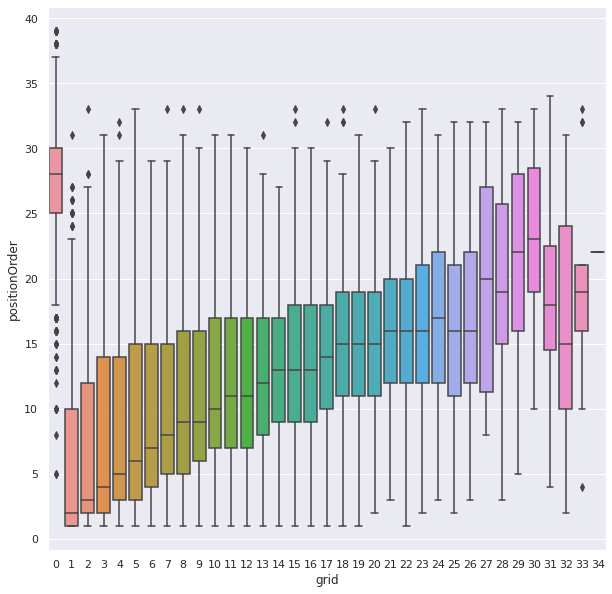

In [ ]:
import seaborn as sns 
#define figure size
sns.set(rc={"figure.figsize":(10, 10)}) #width=8, height=4
sns.boxplot(data = results,
            x = 'grid',
            y= 'positionOrder')

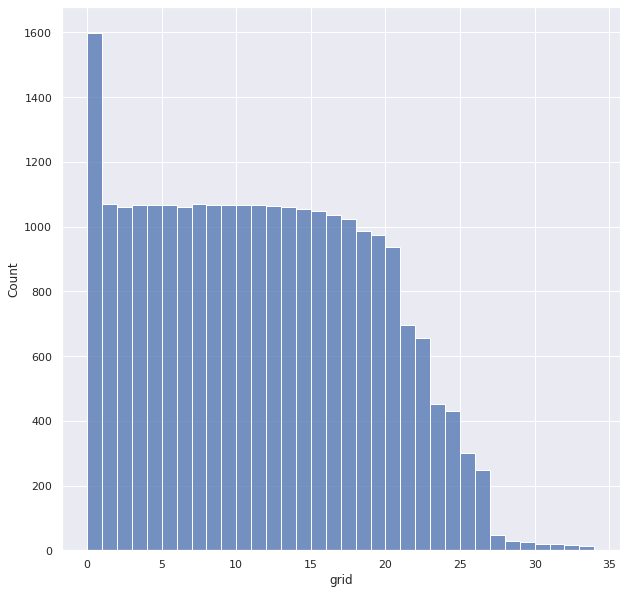

In [ ]:
#Looks like grid values > 0 are rare (probably some really old races) may want to filter it down to recent history
sns.histplot(data = results,
             x = 'grid',
             binwidth = 1)
#also why would we have grid values = 0

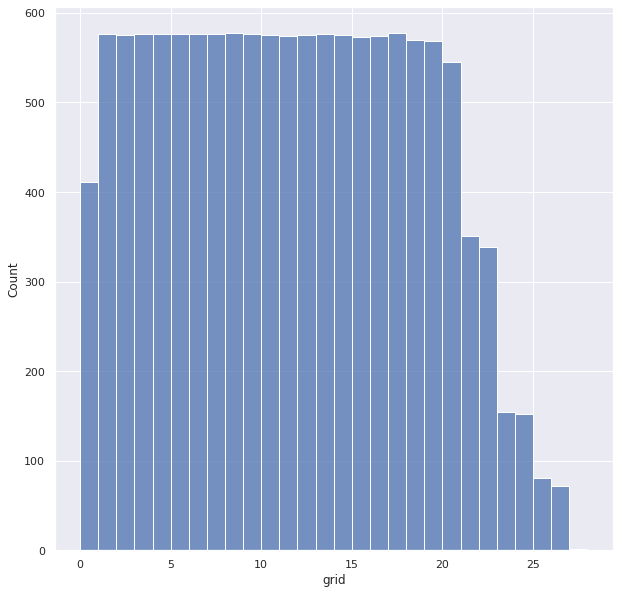

In [ ]:
#how does this look if I filter out results prior to 1990
modern_results = results.merge(races,
                               how = 'inner',
                               on = 'raceId')
modern_results = modern_results[modern_results['year']>=1990]
sns.histplot(data = modern_results,
             x = 'grid',
             binwidth = 1)



[Text(0.5, 1.0, 'Finishing Position Distribution by Grid')]

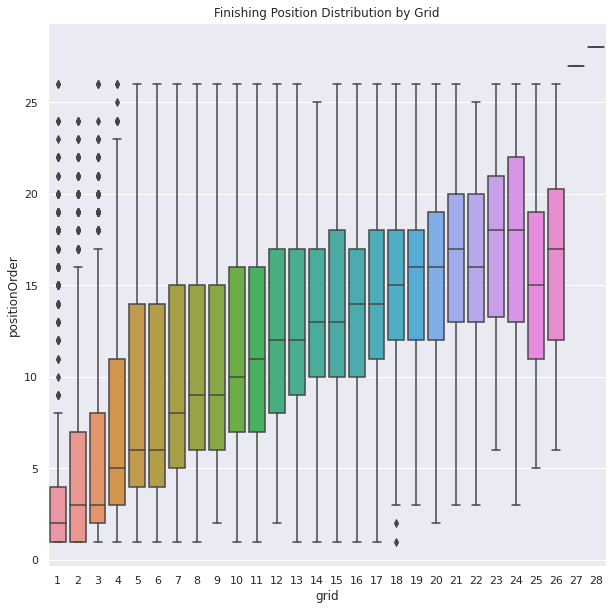

In [ ]:
sns.boxplot(data = modern_results[modern_results['grid']!=0],
            x = 'grid',
            y= 'positionOrder').set(title = 'Finishing Position Distribution by Grid')

In [ ]:
#this needs work

#https://seaborn.pydata.org/examples/kde_ridgeplot.html
#initialize the facet grid
g = sns.FacetGrid(modern_results[(modern_results['grid']>0) & (modern_results['grid']<=20)],
                  row = 'grid',
                  hue = 'grid',
                  aspect = 15,
                  height = 1)
#Draw the densities
g.map(sns.kdeplot, 'positionOrder', 
      bw_adjust=.5,
      clip_on=False,
      fill = True,
      linewidth = 1.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")


# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
x = modern_results[modern_results['grid']==0]
x.sort_values('raceId',ascending=False).merge(drivers,
                                              how='inner',
                                              on='driverId').loc[:,['raceId','name','code']]
#type() what type of object is this?
#set(results.grid) # set = get unique values


,raceId,name,code
0,1075,Saudi Arabian Grand Prix,MSC
1,1071,São Paulo Grand Prix,RAI
2,1063,Belgian Grand Prix,RAI
3,1023,Italian Grand Prix,RAI
4,1013,Azerbaijan Grand Prix,RAI
...,...,...,...
406,159,Brazilian Grand Prix,\N
407,159,Brazilian Grand Prix,\N
408,134,French Grand Prix,\N
409,134,French Grand Prix,FIS


### Note: Grid Values of Zero Indicate start from Pit Lane (usually incident during Quali), recommend recoding them as the max grid + 1 (i.e., last startign position)

###Wrangling
Create a dataframe where each row represents the known information prior to a given race (IVs) and the final race result (DV)

IVs 
- Quali Result
- Last Race Result
- Trailing x lap variance to fastest lap
- Avg Constructor Standing Prior 3 Races
- Trailing Season DNF pct?

DVs
- Points
- Race Order
- Time Variance to Winner (0 = winner, challenge is dnf)

In [ ]:
#create data frame of fastest lap times per lap/race
fastest_laps = lap_times.groupby(['raceId','lap'])['milliseconds'].min().reset_index() #find fastest time per lap/race
fastest_laps = fastest_laps.rename(columns = {'milliseconds':'fast'}) #rename the new column
lap_times = lap_times.merge(fastest_laps) #add the new column to lap_times
lap_times['var'] = lap_times.milliseconds - lap_times.fast #calculated the lap time variance in miliseconds
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds,fast,var
0,841,20,1,1,1:38.109,98109,98109,0
1,841,1,1,2,1:40.573,100573,98109,2464
2,841,17,1,3,1:41.467,101467,98109,3358
3,841,808,1,4,1:42.835,102835,98109,4726
4,841,13,1,5,1:44.196,104196,98109,6087


In [ ]:
#for each race/driver that is in the past, we need the driver id, race id, points earned, result, and time var to winner
df = results.loc[:,['raceId','driverId','positionOrder','points','grid']]

In [ ]:
results.sort_values('raceId')

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
7572,7573,1,1,1,1,18,\N,D,20,0.0,58,\N,\N,39,13,1:29.020,214.455,2
7571,7572,1,5,1,2,12,\N,R,19,0.0,0,\N,\N,\N,\N,\N,\N,4
7570,7571,1,6,3,17,11,\N,R,18,0.0,17,\N,\N,6,18,1:29.923,212.301,3
7569,7570,1,12,4,8,14,\N,R,17,0.0,24,\N,\N,17,19,1:30.502,210.943,20
7568,7569,1,13,6,3,6,\N,R,16,0.0,45,\N,\N,30,15,1:29.141,214.164,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25441,25447,1076,815,9,11,3,2,2,2,18.0,58,+20.524,5287072,58,3,1:21.094,234.305,1
25440,25446,1076,844,6,16,1,1,1,1,26.0,58,1:27:46.548,5266548,58,1,1:20.260,236.740,1
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3
25448,25454,1076,842,213,10,11,9,9,9,2.0,58,+1:16.221,5342769,52,13,1:22.731,229.669,1
